# Chemical Exchange

Chemical exchange is an important phenomenon in magnetic resonance, where a chemical or physical change in a molecule gives rise to a modulation in the chemical shift. Depending on the rate of exchange between two or more chemical shifts, we may observe the effects of exchange using a number of different experiments.

The following tutorial will introduce this concept and investigate effects of various parameters on several different experiments. We'll use SLEEPY (http://sleep-nmr.org) to support our investigations, so take some time to experiment with the software as you go.

In [1]:
# Make sure SLEEPY is installed and on the path
import sys
import os
if 'google.colab' in sys.modules: #Colab
    !pip install sleepy-nmr
elif 'USER' in os.environ and os.environ['USER']=='jovyan': #Binder
    !pip install sleepy-nmr
else:
    os.chdir('../../..')

## Setup

In [2]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

The most basic experiment for observing chemical exchange is a simple 1D experiment, where we exchange between chemical shifts. In this experiment, a coherence, e.g. $\hat{S}^+$, evolves according to

$$
\frac{d}{dt}\langle\hat{S}^+\rangle=-i\Omega\langle\hat{S}^+\rangle
$$

State-space reduction: 4->1


<AxesSubplot:xlabel='t / ms', ylabel='<$^{1}H^+$>'>

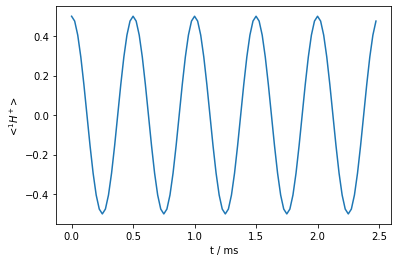

In [17]:
ex0=sl.ExpSys(v0H=500,Nucs='1H')    #Experimental system at 500 MHz with one 1H
ex0.set_inter('CS',i=0,Hz=2000)         #Add a chemical shift to the system
L=sl.Liouvillian(ex0)               #Generate a Liouvillian for the system
seq=L.Sequence(Dt=1/(40000))       #Sequence with a 25 microsecond length

rho=sl.Rho(rho0='1Hx',detect='1Hp')
rho.DetProp(seq,n=100)
rho.plot()

As we see, the system simply oscillates at the given input frequency. Below, we can check what that frequency actually is, by taking the Fourier transform of the above signal, where we see that indeed it oscillates at 2 kHz.

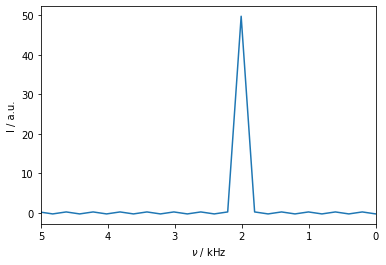

In [19]:
ax=rho.plot(FT=True)
_=ax.set_xlim([5,0])

### Exercise 1:
Typing any of the above objects at the command line will produce a description of the object. Try this to get a feeling for what the critical settings are in this simulation. What is the role of each object in the simulation?

In [9]:
ex0    #For example, ex0

1-spin system (1H)
B0 = 11.743 T (500.000 MHz 1H frequency)
rotor angle = 54.736 degrees
rotor frequency = 10.0 kHz
Temperature = 298 K
Powder Average: alpha0beta0 with 1 angle
Gamma not included
Interactions:
	CS on spin 0 with arguments: (Hz=2500.00)


Now, assume that the system is in one of two states, with chemical shift frequencies $\Omega_1$ and $\Omega_2$. Depending on which state we're in, we have either

$$
\begin{eqnarray}
\frac{d}{dt}\langle\hat{S}^+\rangle&=&-i\Omega_1\langle\hat{S}^+\rangle \\
\frac{d}{dt}\langle\hat{S}^+\rangle&=&-i\Omega_2\langle\hat{S}^+\rangle
\end{eqnarray}
$$

Then, if we hop randomly from state 1 to 2 and vice versa, with rate constants $k_{12}$ and $k_{21}$, we have the following exchange matrix.
$$
\mathbf{k}=
\begin{pmatrix}
-i\Omega_1 - k_{12} & k_{21} \\ k_{12} & -i\Omega_2 - k_{21}
\end{pmatrix}
$$

This can be combined into a single matrix including the oscillation, which yields the following differential equation:

$$
\frac{d}{dt}
\begin{pmatrix}
\langle\hat{S}^+_1\rangle \\ \langle\hat{S}^+_1\rangle
\end{pmatrix}
=
\begin{pmatrix}
-i\Omega_1 - k_{12} & k_{21} \\ k_{12} & -i\Omega_2 - k_{21}
\end{pmatrix}
\cdot
\begin{pmatrix}
\langle\hat{S}^+_1\rangle \\ \langle\hat{S}^+_1\rangle
\end{pmatrix}
$$

This matrix indicates that if we are in state 1, the phase of $\hat{S}_1^+$ will oscillate with frequency of $\Omega_1$, but it will also diffuse with rate $k_{12}$ to state 2, where it will oscillate with frequency $\Omega_2$ and also potentially diffuse back to state one (with rate $k_{21}$).